In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("airline_data.csv")

In [3]:
df

,Airline,Source,Destination,Class,Flight_Status,Aircraft_Type,Booking_Channel,Meal_Preference,Passenger_Gender,Flight_Duration_Minutes,Ticket_Price,Passenger_Age,Baggage_Weight_Kg,Seat_Number,Distance_Km,Delay_Minutes,Loyalty_Points,Extra_Luggage_Fee,Rating_Out_of_5
0,Vistara,Delhi,Lucknow,First,Delayed,ATR72,Airport Counter,Non-Veg,Other,244.0,12104.0,73.0,35.22,160.0,1459.0,35.0,5368.0,NaN,4.8
1,IndiGo,Delhi,Goa,Economy,NaN,A321,Agent,Veg,Female,121.0,13279.0,32.0,39.28,179.0,1330.0,128.0,7614.0,1190.0,1.0
2,SpiceJet,Kolkata,Jaipur,Business,NaN,B777,Online,Veg,Other,135.0,5239.0,53.0,44.59,147.0,1230.0,NaN,3952.0,2326.0,NaN
3,Air India,Bangalore,Pune,Economy,Rescheduled,ATR72,Mobile App,No Meal,Male,339.0,7539.0,38.0,8.34,121.0,839.0,99.0,4738.0,1099.0,NaN
4,IndiGo,Chennai,Ahmedabad,Premium Economy,Delayed,B737,Agent,Non-Veg,Male,276.0,5364.0,NaN,39.87,9.0,706.0,35.0,216.0,1227.0,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Vistara,NaN,Pune,Business,Rescheduled,A321,Mobile App,Veg,Other,186.0,21301.0,56.0,18.03,131.0,738.0,142.0,7766.0,NaN,3.9
4996,SpiceJet,Mumbai,Chandigarh,Business,Cancelled,ATR72,Online,Non-Veg,Female,NaN,15993.0,71.0,30.78,56.0,816.0,176.0,3162.0,3552.0,NaN
4997,Air India,Bangalore,Goa,First,On Time,A320,Mobile App,Veg,Other,356.0,17817.0,NaN,22.40,63.0,1595.0,161.0,3828.0,4076.0,1.4
4998,Air India,Hyderabad,Chandigarh,Business,Delayed,NaN,Agent,Non-Veg,Male,NaN,11070.0,35.0,28.36,144.0,1043.0,123.0,4251.0,603.0,3.5


In [4]:
df.isnull().sum()

Airline                    249
Source                     247
Destination                258
Class                      249
Flight_Status              242
Aircraft_Type              247
Booking_Channel            254
Meal_Preference            252
Passenger_Gender           250
Flight_Duration_Minutes    251
Ticket_Price               249
Passenger_Age              249
Baggage_Weight_Kg          250
Seat_Number                254
Distance_Km                251
Delay_Minutes              250
Loyalty_Points             247
Extra_Luggage_Fee          251
Rating_Out_of_5            254
dtype: int64

In [5]:
df["Airline"] = df["Airline"].fillna(df["Airline"].mode()[0])

In [6]:
df["Source"] = df["Source"].fillna(df["Source"].mode()[0])

In [7]:
df["Destination"] = df["Destination"].fillna(df["Destination"].mode()[0])

In [8]:
df["Class"] = df["Class"].fillna(df["Class"].mode()[0])


In [9]:
df["Booking_Channel"] = df["Booking_Channel"].fillna("Unknown")

In [10]:
df["Passenger_Gender"] = df["Passenger_Gender"].fillna(df["Passenger_Gender"].mode()[0])

In [11]:
df["Flight_Duration_Minutes"] = df["Flight_Duration_Minutes"].fillna(df["Flight_Duration_Minutes"].mean())

In [12]:
df["Ticket_Price"] = df["Ticket_Price"].fillna(df["Ticket_Price"].mean())

In [13]:
df["Passenger_Age"] = df["Passenger_Age"].fillna(df["Passenger_Age"].median())

In [14]:
df["Baggage_Weight_Kg"] = df["Baggage_Weight_Kg"].fillna(df["Baggage_Weight_Kg"].median())

In [15]:
df["Distance_Km"] = df["Distance_Km"].fillna(df["Distance_Km"].mean())

In [16]:
df["Rating_Out_of_5"] = df["Rating_Out_of_5"].fillna(df["Rating_Out_of_5"].mean())

In [17]:
df.isnull().sum()

Airline                      0
Source                       0
Destination                  0
Class                        0
Flight_Status              242
Aircraft_Type              247
Booking_Channel              0
Meal_Preference            252
Passenger_Gender             0
Flight_Duration_Minutes      0
Ticket_Price                 0
Passenger_Age                0
Baggage_Weight_Kg            0
Seat_Number                254
Distance_Km                  0
Delay_Minutes              250
Loyalty_Points             247
Extra_Luggage_Fee          251
Rating_Out_of_5              0
dtype: int64

In [18]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Airline                  5000 non-null   str    
 1   Source                   5000 non-null   str    
 2   Destination              5000 non-null   str    
 3   Class                    5000 non-null   str    
 4   Flight_Status            4758 non-null   str    
 5   Aircraft_Type            4753 non-null   str    
 6   Booking_Channel          5000 non-null   str    
 7   Meal_Preference          4748 non-null   str    
 8   Passenger_Gender         5000 non-null   str    
 9   Flight_Duration_Minutes  5000 non-null   float64
 10  Ticket_Price             5000 non-null   float64
 11  Passenger_Age            5000 non-null   float64
 12  Baggage_Weight_Kg        5000 non-null   float64
 13  Seat_Number              4746 non-null   float64
 14  Distance_Km              5000 non-n

In [19]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Class', 'Flight_Status',
       'Aircraft_Type', 'Booking_Channel', 'Meal_Preference',
       'Passenger_Gender', 'Flight_Duration_Minutes', 'Ticket_Price',
       'Passenger_Age', 'Baggage_Weight_Kg', 'Seat_Number', 'Distance_Km',
       'Delay_Minutes', 'Loyalty_Points', 'Extra_Luggage_Fee',
       'Rating_Out_of_5'],
      dtype='str')

In [20]:
df["Flight_Status"] = df["Flight_Status"].fillna(df["Flight_Status"].mode()[0])

In [21]:
df["Aircraft_Type"] = df["Aircraft_Type"].fillna(df["Aircraft_Type"].mode()[0])	

In [22]:
df["Meal_Preference"] = df["Meal_Preference"].fillna("No Meal")

In [23]:
a = np.random.randint(50,123)
df["Seat_Number"] = df["Seat_Number"].fillna(a)

In [24]:
df["Delay_Minutes"] = df["Delay_Minutes"].fillna(df["Delay_Minutes"].mean())

In [25]:
b = np.random.randint(3000,5400)
df["Loyalty_Points"] = df["Loyalty_Points"].fillna(b)

In [26]:
df["Extra_Luggage_Fee"] = df["Extra_Luggage_Fee"].fillna(b)

In [27]:
df.isnull().sum()

Airline                    0
Source                     0
Destination                0
Class                      0
Flight_Status              0
Aircraft_Type              0
Booking_Channel            0
Meal_Preference            0
Passenger_Gender           0
Flight_Duration_Minutes    0
Ticket_Price               0
Passenger_Age              0
Baggage_Weight_Kg          0
Seat_Number                0
Distance_Km                0
Delay_Minutes              0
Loyalty_Points             0
Extra_Luggage_Fee          0
Rating_Out_of_5            0
dtype: int64

In [28]:
df.to_csv("clean_data_airline.csv",index = False)

### Graphs

In [29]:
a = df["Passenger_Gender"].value_counts()

In [30]:
a

Passenger_Gender
Other     1875
Female    1590
Male      1535
Name: count, dtype: int64

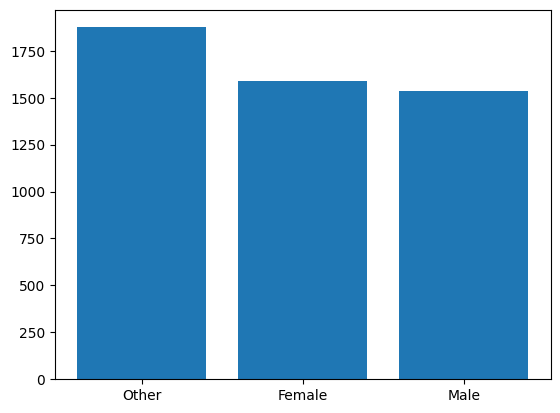

In [31]:
a = df["Passenger_Gender"].value_counts()

plt.bar(a.index, a.values)
plt.show()


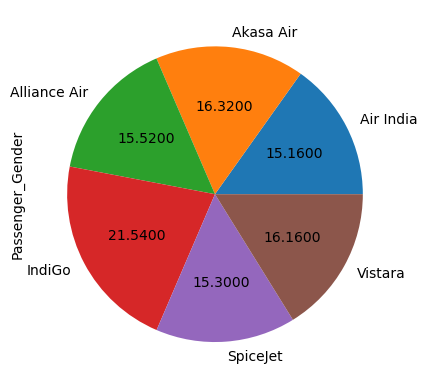

In [36]:
a = df.groupby("Airline")["Passenger_Gender"].count().plot(kind="pie",autopct = "%.4f")

#plt.barh(a.index, a.values)
plt.show()


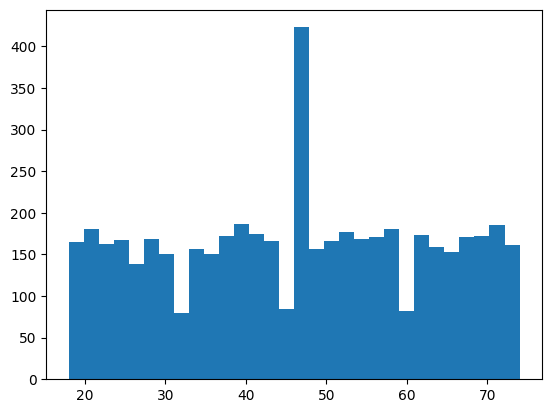

In [36]:
plt.hist(df["Passenger_Age"], bins=30) 
# bins - bydefault 10 
# more bins= precised graph
plt.show()

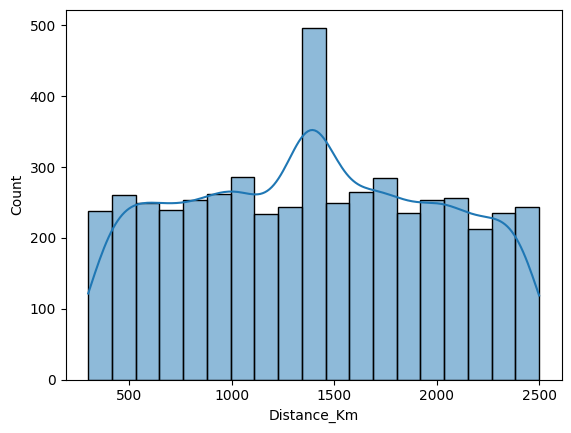

In [71]:
sns.histplot(df["Distance_Km"], kde=True)
plt.show()

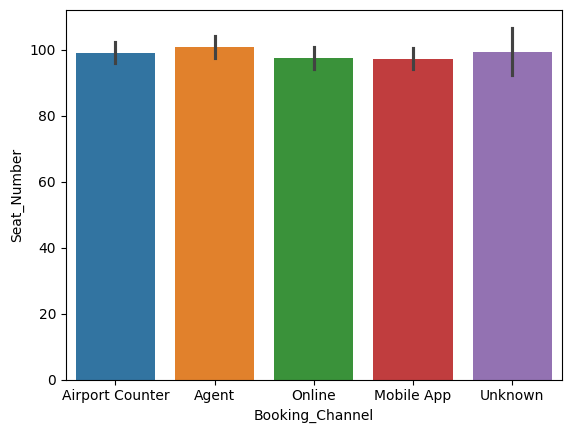

In [43]:
sns.barplot(x = df["Booking_Channel"],y = df["Seat_Number"],hue=df["Booking_Channel"])
plt.show()

<BarContainer object of 5000 artists>

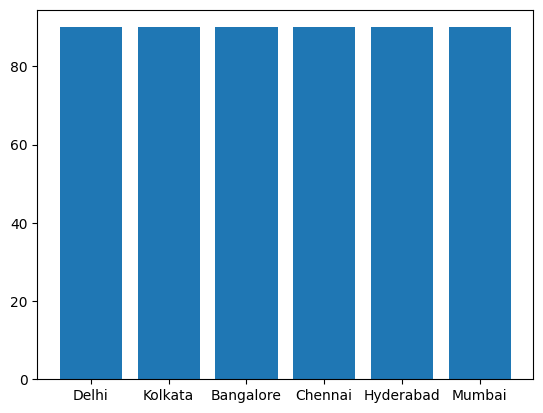

In [59]:
plt.bar(df["Source"],df["Delay_Minutes"].mean())

In [57]:
a = df.groupby("Airline")["Delay_Minutes"].median()

#plt.barh(a.index, a.values)
#plt.show()
a

Airline
Air India       89.957895
Akasa Air       89.957895
Alliance Air    91.000000
IndiGo          89.957895
SpiceJet        89.957895
Vistara         89.957895
Name: Delay_Minutes, dtype: float64

<BarContainer object of 5000 artists>

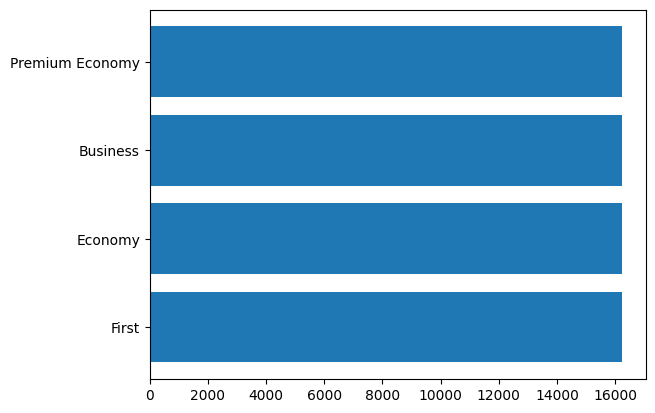

In [ ]:
plt.barh(df["Class"],df["Ticket_Price"].mean())

In [ ]:
a = df.groupby("Class")["Ticket_Price"].mean()

#plt.barh(a.index, a.values)
#plt.show()
a

Class
Business           16272.360298
Economy            16465.423670
First              15630.248349
Premium Economy    16571.688609
Name: Ticket_Price, dtype: float64

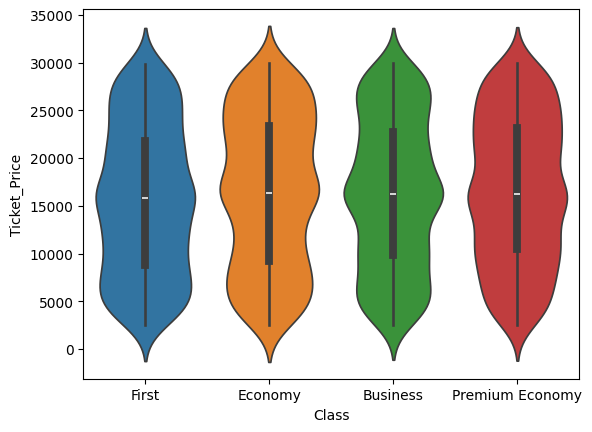

In [73]:
sns.violinplot(x="Class", y="Ticket_Price",hue="Class" ,data = df)
plt.show()


In [80]:
# #Correlation Heatmap :- Correlation tells us how strongly two numeric variables are related
# corr = df.corr(numeric_only=True)
# sns.heatmap(corr, annot=True, cmap="coolwarm")
# plt.Figure(figsize=(30,10))
# plt.show()

In [79]:
#sns.pairplot(df)

In [83]:
#plt.plot(df["Aircraft_Type"],df["Passenger_Gender"])

In [111]:
#using pandas
flight=df.groupby("Flight_Status")["Airline"].count().reset_index()

In [125]:
# sns.lineplot(x= flight["Flight_Status"], y=flight["Airline"],marker="p",color = "red")
# plt.rcParams['figure.facecolor'] = 'lightblue'
# plt.rcParams['axes.facecolor'] = 'lightyellow'


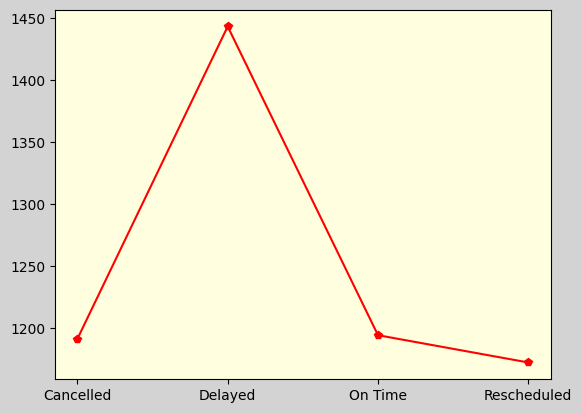

In [126]:
fig, ax = plt.subplots()

fig.patch.set_facecolor("lightgray")
ax.set_facecolor("lightyellow")

ax.plot(flight["Flight_Status"], flight["Airline"],marker="p",color = "red")
plt.show()


In [127]:
df.groupby("Meal_Preference")["Passenger_Gender"].count()

Meal_Preference
No Meal    1436
Non-Veg    1106
Veg        1270
Vegan      1188
Name: Passenger_Gender, dtype: int64

<BarContainer object of 5000 artists>

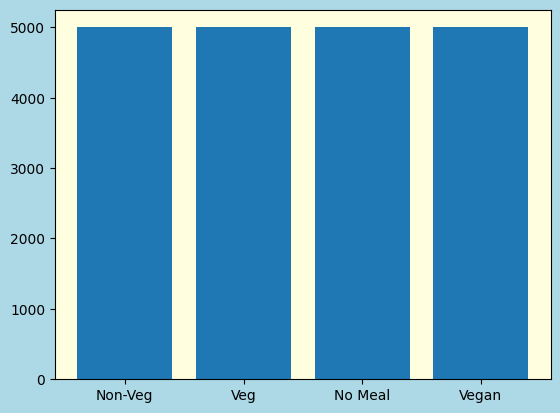

In [128]:
plt.bar(df["Meal_Preference"],df["Passenger_Gender"].count())
